In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats 

In [2]:
#Doing Linear Regression First
#Creating Fake Data

In [3]:
page_speed_read = np.random.normal(3.0, 1, 1000)

purchase_book = 100 - (page_speed_read + np.random.normal(0, 0.1, 1000)*3)

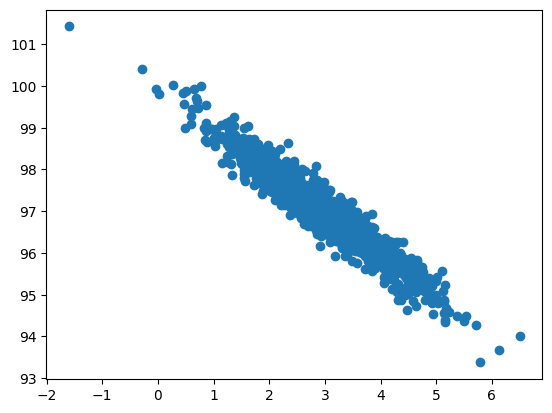

In [4]:
plt.scatter(page_speed_read, purchase_book)

In [5]:
slope, intercept, r_value, p_value, std_err = stats.linregress(page_speed_read, purchase_book)

In [6]:
r_value**2

0.9122409361415581

In [7]:
def predict(x):
    return slope*x + intercept

fitLine = predict(page_speed_read)

<function matplotlib.pyplot.show(close=None, block=None)>

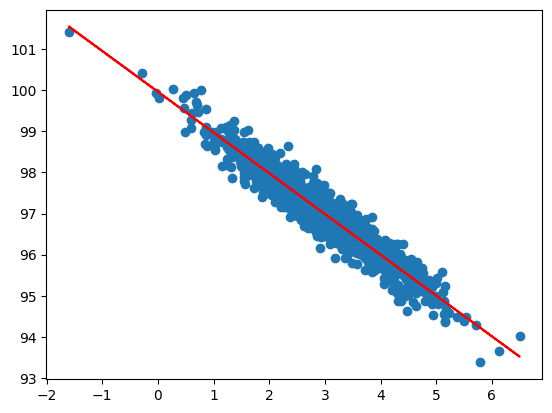

In [8]:
plt.scatter(page_speed_read, purchase_book) #this is the original scatter plot
plt.plot(page_speed_read, fitLine, c='r') #this is a simple line plot 
                                          #but the coordinates are of the line that we just found out.          
plt.show

In [9]:
#Introducing polynomail regression from here.

In [10]:
np.random.seed(2)
page_speed_read = np.random.normal(3.0, 1, 1000)

purchase_book = np.random.normal(50, 10, 1000)/page_speed_read

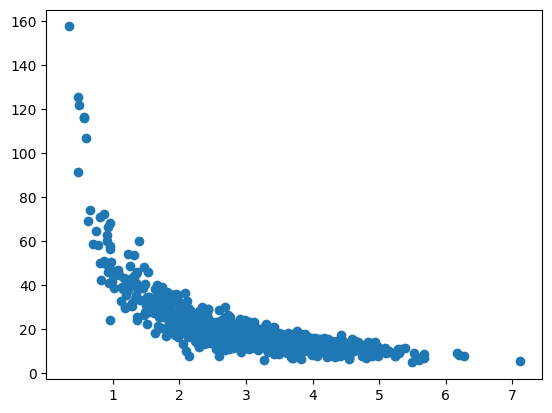

In [11]:
plt.scatter(page_speed_read, purchase_book)

In [39]:
x = np.array(page_speed_read)
y = np.array(purchase_book)

p4 = np.poly1d(np.polyfit(x,y,4))



In [40]:
p4


poly1d([   0.54005597,   -8.85641318,   52.25378374, -135.34422815,
        147.6050662 ])

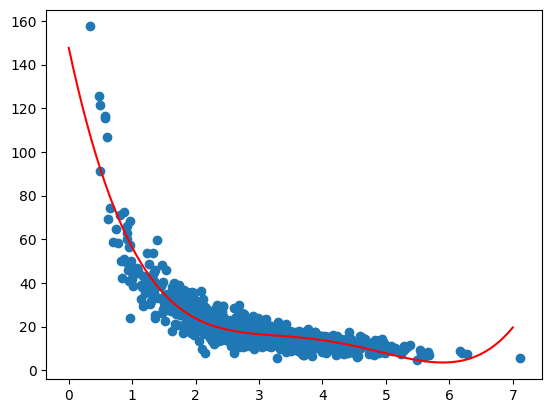

In [54]:
xp = np.linspace(0,7, 100)
plt.scatter(x,y)
plt.plot(xp, p4(xp), c='r')
plt.show()

In [51]:
#calculating r-squared score now.

from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x))

In [52]:
r2

0.8293766396303073

In [55]:
import pandas as pd

In [57]:
cars_data = pd.read_excel("cars.xls")

In [60]:
cars_data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [63]:
import statsmodels.api as sm

In [64]:
cars_data['Model_ord'] = pd.Categorical(cars_data.Model).codes 

In [66]:
cars_data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Model_ord
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,10
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,10
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,10
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,10
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,10


In [68]:
X = cars_data[['Mileage', 'Model_ord', 'Doors']]
y = cars_data[['Price']]

X1 = sm.add_constant(X)
est = sm.OLS(y, X1).fit()

In [70]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     11.57
Date:                Mon, 10 Mar 2025   Prob (F-statistic):           1.98e-07
Time:                        12:59:57   Log-Likelihood:                -8519.1
No. Observations:                 804   AIC:                         1.705e+04
Df Residuals:                     800   BIC:                         1.706e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.125e+04   1809.549     17.272      0.000    2.77e+04    3.48e+04
Mileage       -0.1765      0.042     -4.227      0.000      -0.259      -0.095
Model_ord    -39.0387     39.326     -0.993      0.321    -116.234      38.157
Doors      -1652.9303    402.649     -4.105      0.000   -2443.303    -862.558
==============================================================================
Omnibus:                      206.410   Durbin-Watson:                   0.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              470.872
Skew:                           1.379   Prob(JB):                    5.64e-103
Kurtosis:                       5.541   Cond. No.                     1.15e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
y.groupby(cars_data.Doors).mean()

,Price
Doors,
2,23807.135520
4,20580.670749
